# MedVis 23 - Exercise Sheet 3 - Additional Material


---



# Preparation

Here the necessary libraries are included.

In [7]:
!pip install scipy
!pip install pydicom
!pip install PyMCubes


import os # for file-handling
import numpy as np # maths
import matplotlib.pyplot as plt # plotting
from scipy import ndimage # image processing
from pydicom import dcmread # reading DICOM files

import plotly.graph_objects as go # 3D plot
import mcubes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.3/274.3 kB 4.8 MB/s eta 0:00:00


Function for reading the MRI volume

In [2]:
# Read a volume and convert to numpy array
def read_dcm_volume(name):
    volume_img = []
    for file in sorted(os.listdir(name)):
        dcm_slice = dcmread(os.path.join(name, file))
        volume_img.append(dcm_slice.pixel_array)
    return np.transpose(np.array(volume_img),(1,2,0))

# Task 4

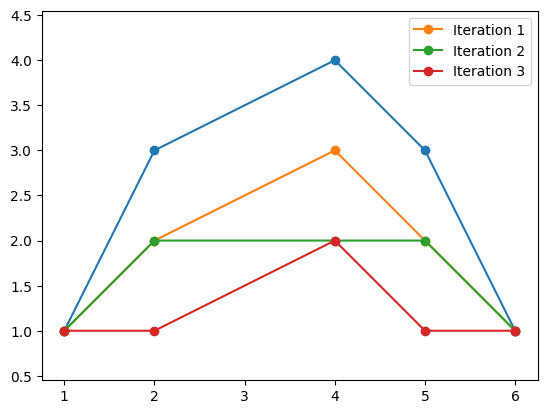

In [6]:
x = np.array([1,2,4,5,6])
y = np.array([1,3,4,3,1])

plt.plot(x,y)
plt.scatter(x,y)
plt.gca().axis('equal')


def laplacian_smoothing(x, y, iterations, lam):
    for _ in range(iterations):
        smoothed_y = y.copy()
        for i in range(1, len(y) - 1):
            smoothed_y[i] = (1 - lam) * y[i] + lam * (y[i - 1] + y[i + 1]) / 2
        y = smoothed_y

    return y

# Perform Laplacian smoothing for three iterations with lambda (lam) value
lam = 0.2  # You can adjust this value based on your preference
iterations = 3

for iteration in range(1, iterations + 1):
    y_smoothed = laplacian_smoothing(x, y, iteration, lam)
    plt.plot(x, y_smoothed, label=f'Iteration {iteration}', marker='o')

plt.legend()
plt.gca().axis('equal')
plt.show()


# Task 5

In [8]:
# create a 3D data set of the slice images, like in the previous exercise sheets
# this can be used as input for the marching cubes algorithm
dcm_volume = read_dcm_volume('/opt/google/drive/dicom_data')

In [9]:
###########################
# Use Marching Cubes here #
###########################
# set the appropriate isovalue based on your data
isovalue = 1000

# Generate surface mesh using Marching Cubes
vertices, faces = mcubes.marching_cubes(dcm_volume, isovalue)

# after generating vertices and faces using marching cubes
# adjust the position of the data (remember that the data set is anisotropic)
vertices[:,0] *= 0.859375
vertices[:,1] *= 0.859375
vertices[:,2] *= 7

Below is some example code for plotting the data. Remember to rename the variables so that it will fit to your previous code. If you do not manage to plot the data, you can also export it to an .OBJ file using [PyMCubes](https://github.com/pmneila/PyMCubes).

In [10]:
# transpose matrices
x, y, z = vertices.T
i,j,k = faces.T

In [11]:
#
fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, i=i,j=k,k=j, flatshading=True,color='lightpink', opacity=1.00,
              lighting=dict(ambient=0.18,
                             diffuse=1,
                             fresnel=0.1,
                             specular=1,
                             roughness=0.05,
                             facenormalsepsilon=1e-15,
                             vertexnormalsepsilon=1e-15),
               lightposition=dict(x=0,
                                  y=100,
                                  z=100
                                 ))])

fig.show()